# Hypothesis: 
A greater number of mass shootings will occur as a result of the shooter suffering from mental illness rather than being motivated by race?


# Questions to explore: 
1. Are there any relationships with attributes of the shooter - age, gender, mental health, race?
2. How frequent are mass shootings occurring in the US - weekly, monthly, annually? 
3. Where and when are mass shootings occurring most? 
4. Is there a correlation between location fatalities vs. injured? 
5. Weapon and shooting type?

# Exploration ideas: 
* Trump is a righty but his fans like to call themselves lefties ---- for LOLs
* Comparison between 2016 vs 2006 (10 year comparison) 
-- Year, Location, Number of Shootings related to race and mental illness 
* Explore the states/locations of these two years 
* Did potential technology advancements influence the weapon type involved in the shootings?
* Mainstream media/celebrities have influences on the shootings?
* Victims involved - types of people involved? 
* Why did the number of shootings suddenly increase so high? Did most shooters have a mental illness or were they racially motivated? 

# Presentation: 
* Executive summary/key findings 
* How did we decide on this topic? Other topics we were going to explore was housing in Sydney though there was limited data available. 
* Brainstormed other ideas like mass shootings and explored the datasets available to us
* Explored the data 
* Hypothesised different ideas and make a prediction/recommendation 
* Allow for question time - "Due to the limited time constraints..."

In [1]:
import pandas as pd 
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline


In [2]:
big_shoot = Path("big_shoot.csv")
big_shoot_df = pd.read_csv(big_shoot)
pd.set_option('display.max_columns', None)

In [75]:
big_shoot_df = big_shoot_df.drop(['CaseID','Data Source 1','Data Source 2','Data Source 3','Data Source 4','Data Source 5','Data Source 6','Data Source 7','Notes','Edit Date'],axis=1)
big_shoot_df.tail(10)

,Title,Location,City,State,Latitude,Longitude,Civilian Fatalities,Civilian Injured,Enforcement Fatalities,Enforcement Injured,Total Fatalities,Total Victims,Description,Date,Day,Date - Detailed,Shooter Name,Number of shooters,Shooter Age(s),Average Shooter Age,Shooter Sex,Shooter Race,Type of Gun - Detailed,Type of Gun - General,Total Shotguns,Total Rifles,Total Handguns,Total Guns Used,Total Automatic Guns,Total Semi-Automatic Guns,Fate of Shooter at the scene,Fate of Shooter,Shooter's Cause of Death,School Related,Place Type,Relationship to Incident Location,Targeted Victim/s - Detailed,Targeted Victim/s - General,Possible Motive - Detailed,Possible Motive - General,Mental Illness Details,Mental Illness,Military Experience,Class,Depreciation,Year
324,Trailer park triple homocide in South Carolina,"Ravenel, South Carolina",Ravenel,South Carolina,32.763232,-80.250099,3,1,0,0,3,4,Suspect shot and killed three women and injure...,5/17/2016,Tuesday,"Tuesday, May 17, 2016",Kenneth Ancrum,1,23,23,Male,Black American or African American,Cops found a pistol on the suspect,Handgun,0,0,1,1,0,0,Custody,Custody,Not Applicable,No,Residential home,Place of residency,"The victims were four females, 3 died, 1 injur...",Romantic Partner,"Little is known about the motivation, but the ...",Domestic Dispute,Unkown,Unknown,Unknown,MS,1,2016
325,Graduation party drive by,"Jackson, Georgia",Jackson,Georgia,33.294565,-83.966021,1,3,0,0,1,4,Graduation party with over 200 people was fire...,5/18/2016,Wednesday,"Wednesday, May 18, 2016",Gemarius Oneal & Christopher Walker,2,19 & 19,19,Male,Black American or African American,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Escaped,Custody,Not Applicable,Yes,Residential home,Place of residency,It is unkown if there were specific targets in...,Social,Unknown,Unknown,Unknown,Unknown,Unknown,MS,1,2016
326,"Stockton, CA murder","Stockton, California",Stockton,California,37.957702,-121.290780,1,3,0,0,1,4,Police were dispatched at the early AM hours S...,5/21/2016,Saturday,"Saturday, May 21, 2016",Robert Michael Baguindo,1,21,21,Male,White American or European American,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Escaped,Custody,Not Applicable,No,Street/Highway,Unknown,Little / no information is public about the sp...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,MS,1,2016
328,Las Vegas sidewalk shooting,"Las Vegas, Nevada",Las Vegas,Nevada,36.169941,-115.139830,0,4,0,0,0,4,Two men were having an argument on a sidewalk ...,5/29/2016,Sunday,"Sunday, May 29, 2016","Steven Burks, Pierre Devlin",2,"20,32",26,Male,Black American or African American,Handgun,Handgun,0,0,1,1,0,0,Escaped,Arrested,Not Applicable,No,Street/Highway,None,The victims appear to be random people who got...,General Public,Social Dispute,Social Dispute,Unknown,Unknown,Unknown,MS,1,2016
329,Army vet shooting in Houston,"Houston, Texas",Houston,Texas,29.760427,-95.369803,1,4,0,2,2,7,Suspect started shooting people at an auto det...,5/29/2016,Sunday,"Sunday, May 29, 2016",Dionisio Garza,1,25,25,Male,Some Other Race,He had a pistol and an AR-15,Multiple Guns,0,1,1,2,0,1,Deceased,Deceased,Suicide,No,Retail/Wholesale/Services facility,None,Victims appear to be random,General Public,Unknown,Unknown,Yes - suspect was a combat vet and may have su...,Yes,Yes,MS,1,2016
330,Fort Warne drive by,"Fort Wayne, Indiana",Fort Wayne,Indiana,41.079273,-85.139351,0,4,0,0,0,4,Police arrived at a house that was fired upon ...,5/31/2016,Tuesday,"Tuesday, May 31, 2016",Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Escaped,Escaped,Not Applicable,No,Residential home/Neighborhood,Unknown,No information is known about the specific mot...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,MS,1,2016
331,Cape Coral Shooting Spree,"Cape Coral, Florida",Cape Coral,Florida,26.562854,-81.949533,2,3,0,0,3,5,"On June 7th, 2016, a gunman shot and killed a ...",6/7/2016,Tuesday,"Tuesday

In [4]:
big_shoot_df = big_shoot_df.dropna()

In [5]:
big_shoot_df.isnull().mean() * 100

Title                                   0.0
Location                                0.0
City                                    0.0
State                                   0.0
Latitude                                0.0
Longitude                               0.0
Number of Civilian Fatalities           0.0
Number of Civilian Injured              0.0
Number of Enforcement Fatalities        0.0
Number of Enforcement Injured           0.0
Total Number of Fatalities              0.0
Total Number of Victims                 0.0
Description                             0.0
Date                                    0.0
Day of Week                             0.0
Date - Detailed                         0.0
Shooter Name                            0.0
Number of shooters                      0.0
Shooter Age(s)                          0.0
Average Shooter Age                     0.0
Shooter Sex                             0.0
Shooter Race                            0.0
Type of Gun - Detailed          

In [6]:
big_shoot_df = big_shoot_df.rename(columns={'Number of Civilian Fatalities':'Civilian Fatalities',
                                            'Number of Civilian Injured':'Civilian Injured',
                                            'Number of Enforcement Fatalities':'Enforcement Fatalities',
                                            'Number of Enforcement Injured':'Enforcement Injured',
                                            'Total Number of Fatalities':'Total Fatalities',
                                            'Total Number of Victims':'Total Victims',
                                            'Day of Week':'Day',
                                            'Number of Shotguns':'Total Shotguns',
                                            'Number of Rifles':'Total Rifles',
                                            'Number of Handguns':'Total Handguns',
                                            'Number of Automatic Guns':'Total Automatic Guns',
                                            'Number of Semi-Automatic Guns':'Total Semi-Automatic Guns',
                                            'Total Number of Guns':'Total Guns Used',
                                            'History of Mental Illness - Detailed':'Mental Illness Details',
                                            'History of Mental Illness - General':'Mental Illness'
                                           })
big_shoot_df.head(10)

,Title,Location,City,State,Latitude,Longitude,Civilian Fatalities,Civilian Injured,Enforcement Fatalities,Enforcement Injured,Total Fatalities,Total Victims,Description,Date,Day,Date - Detailed,Shooter Name,Number of shooters,Shooter Age(s),Average Shooter Age,Shooter Sex,Shooter Race,Type of Gun - Detailed,Type of Gun - General,Total Shotguns,Total Rifles,Total Handguns,Total Guns Used,Total Automatic Guns,Total Semi-Automatic Guns,Fate of Shooter at the scene,Fate of Shooter,Shooter's Cause of Death,School Related,Place Type,Relationship to Incident Location,Targeted Victim/s - Detailed,Targeted Victim/s - General,Possible Motive - Detailed,Possible Motive - General,Mental Illness Details,Mental Illness,Military Experience,Class,Depreciation
0,University of Texas at Austin,"Austin, Texas",Austin,Texas,30.198887,-97.844159,15,32,1,0,16,48,"On August 1, 1966, a 25-year-old engineering s...",8/1/1966,Monday,"Monday, August 01, 1966",Charles S. Whitman,1,25,25,Male,White American or European American,"Remington 700 ADL (6mm), Universal M1 carbine,...",Multiple guns,1,3,3,7,0,1,Deceased,Deceased,Killed,Yes,College/University/Adult education,Place of schooling,"Family, students, teachers, and police",General public,A task force of professionals known as the Con...,Mental illness,Shooter had visited a psychiatrist and severa...,Yes,Yes,SPK,1
1,Rose-Mar College of Beauty,"Mesa, Arizona",Mesa,Arizona,33.422687,-111.816320,5,1,0,0,5,6,"On November 12, 1966, an 18-year-old high scho...",11/12/1966,Saturday,"Saturday, November 12, 1966",Robert Benjamin Smith,1,18,18,Male,White American or European American,.22 caliber pistol,Handgun,0,0,1,1,0,0,Custody,Custody,Not applicable,Yes,College/University/Adult education,None,"Four beauty school students, one client, and h...",Students/Classmates/Teacher,"When he was being arrested, the shooter announ...",Mental illness,Diagnosed as schizophrenic. Possible psychopathy,Yes,Unknown,MS,1
2,New Orleans Police Shootings,"New Orleans, Louisiana",New Orleans,Louisiana,30.068724,-89.931474,4,8,5,5,10,22,"On New Year's Eve in 1972, a 23-year-old ex-Na...",12/31/1972,Sunday,"Sunday, December 31, 1972",Mark James Robert Essex,1,23,23,Male,Black American or African American,5-shot Ruger Model 44 (.44 caliber) semi-autom...,Multiple guns,0,1,1,2,0,1,Deceased,Deceased,Killed,No,Government facility,Local government,Police officers and members of the public,Government,The shooter claimed he was subjected to two ye...,Race,"During his time at the US Navy, the shooter si...",Yes,Unknown,SPK,1
3,Clara Barton Elementary School,"Chicago, Illinois",Chicago,Illinois,41.839280,-87.688181,1,3,0,0,1,4,"On January 17, 1974, a 14-year-old student ent...",1/17/1974,Thursday,"Thursday, January 17, 1974",Steven Guy,1,14,14,Male,Unknown,".38 caliber snub-nose revolver, .45 caliber pi...",Handgun,0,0,2,2,0,0,Custody,Custody,Not applicable,Yes,Primary school,Place of schooling,"School principal, teachers, and school guard",Students/Classmates/Teacher,"Former student, upset at being expelled and pl...",Expulsion/Suspension,The student was acquitted of murder charges by...,Yes,Unknown,MS,1
4,Olean High School,"Olean, New York",Olean,New York,42.081854,-78.432139,3,7,0,0,3,10,"On December 30, 1974, a 17-year-old honor stud...",12/30/1974,Monday,"Monday, December 30, 1974",Anthony F. Barbaro,1,17,17,Male,White American or European American,Remington .30-06-caliber rifle with telescopic...,Multiple guns,1,1,0,2,0,0,Custody,Custody,Not applicable,Yes,Secondary school,Place of schooling,School custodian and general public on the street,General public,In a note explaining his motives Barbaro wrote...,Mental illness,"In April 1975, the shooter entered a plea of n...",No,Unknown,MS,1
5,Los Angeles Computer Learning Center,"Los Angeles, California",Los Angeles,California,34.176221,-118.539954,1,6,1,0,1,8,"On February 19, 1976, a 18-year-old student at...",2/19/1976,Thursday,"Thursday, February 19, 1976",Neil Jordan Liebeskind,1,18,18,Male

In [7]:
big_shoot_df['Year'] = pd.DatetimeIndex(big_shoot_df['Date']).year
big_shoot_df

,Title,Location,City,State,Latitude,Longitude,Civilian Fatalities,Civilian Injured,Enforcement Fatalities,Enforcement Injured,Total Fatalities,Total Victims,Description,Date,Day,Date - Detailed,Shooter Name,Number of shooters,Shooter Age(s),Average Shooter Age,Shooter Sex,Shooter Race,Type of Gun - Detailed,Type of Gun - General,Total Shotguns,Total Rifles,Total Handguns,Total Guns Used,Total Automatic Guns,Total Semi-Automatic Guns,Fate of Shooter at the scene,Fate of Shooter,Shooter's Cause of Death,School Related,Place Type,Relationship to Incident Location,Targeted Victim/s - Detailed,Targeted Victim/s - General,Possible Motive - Detailed,Possible Motive - General,Mental Illness Details,Mental Illness,Military Experience,Class,Depreciation,Year
0,University of Texas at Austin,"Austin, Texas",Austin,Texas,30.198887,-97.844159,15,32,1,0,16,48,"On August 1, 1966, a 25-year-old engineering s...",8/1/1966,Monday,"Monday, August 01, 1966",Charles S. Whitman,1,25,25,Male,White American or European American,"Remington 700 ADL (6mm), Universal M1 carbine,...",Multiple guns,1,3,3,7,0,1,Deceased,Deceased,Killed,Yes,College/University/Adult education,Place of schooling,"Family, students, teachers, and police",General public,A task force of professionals known as the Con...,Mental illness,Shooter had visited a psychiatrist and severa...,Yes,Yes,SPK,1,1966
1,Rose-Mar College of Beauty,"Mesa, Arizona",Mesa,Arizona,33.422687,-111.816320,5,1,0,0,5,6,"On November 12, 1966, an 18-year-old high scho...",11/12/1966,Saturday,"Saturday, November 12, 1966",Robert Benjamin Smith,1,18,18,Male,White American or European American,.22 caliber pistol,Handgun,0,0,1,1,0,0,Custody,Custody,Not applicable,Yes,College/University/Adult education,None,"Four beauty school students, one client, and h...",Students/Classmates/Teacher,"When he was being arrested, the shooter announ...",Mental illness,Diagnosed as schizophrenic. Possible psychopathy,Yes,Unknown,MS,1,1966
2,New Orleans Police Shootings,"New Orleans, Louisiana",New Orleans,Louisiana,30.068724,-89.931474,4,8,5,5,10,22,"On New Year's Eve in 1972, a 23-year-old ex-Na...",12/31/1972,Sunday,"Sunday, December 31, 1972",Mark James Robert Essex,1,23,23,Male,Black American or African American,5-shot Ruger Model 44 (.44 caliber) semi-autom...,Multiple guns,0,1,1,2,0,1,Deceased,Deceased,Killed,No,Government facility,Local government,Police officers and members of the public,Government,The shooter claimed he was subjected to two ye...,Race,"During his time at the US Navy, the shooter si...",Yes,Unknown,SPK,1,1972
3,Clara Barton Elementary School,"Chicago, Illinois",Chicago,Illinois,41.839280,-87.688181,1,3,0,0,1,4,"On January 17, 1974, a 14-year-old student ent...",1/17/1974,Thursday,"Thursday, January 17, 1974",Steven Guy,1,14,14,Male,Unknown,".38 caliber snub-nose revolver, .45 caliber pi...",Handgun,0,0,2,2,0,0,Custody,Custody,Not applicable,Yes,Primary school,Place of schooling,"School principal, teachers, and school guard",Students/Classmates/Teacher,"Former student, upset at being expelled and pl...",Expulsion/Suspension,The student was acquitted of murder charges by...,Yes,Unknown,MS,1,1974
4,Olean High School,"Olean, New York",Olean,New York,42.081854,-78.432139,3,7,0,0,3,10,"On December 30, 1974, a 17-year-old honor stud...",12/30/1974,Monday,"Monday, December 30, 1974",Anthony F. Barbaro,1,17,17,Male,White American or European American,Remington .30-06-caliber rifle with telescopic...,Multiple guns,1,1,0,2,0,0,Custody,Custody,Not applicable,Yes,Secondary school,Place of schooling,School custodian and general public on the street,General public,In a note explaining his motives Barbaro wrote...,Mental illness,"In April 1975, the shooter entered a plea of n...",No,Unknown,MS,1,1974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,Fort Warne drive by,"Fort Wayne, Ind

### Visualising the dataset
Shootings tend to occur most in the middle (Wednesdays), followed by Fridays and Mondays. 

The number of shootings across the years were steadily increasing however in 2015 and 2016, there was an unexpected increase in the number of shooting occurences. In these two recent years, we also saw the highest number of fatalities as a result of the shooting. 

Shootings are also occuring most in the state of California, with a total of 35 shootings over the years whilst states like Iowa, South Dakota and Maine have the least number of shootings in the past 5-6 decades.

Residential Homes and Neighbourhoods are where shootings are also taking place the most and secondary schools and cafes or restaurants have the least number of occurences.

<AxesSubplot:xlabel='Day'>

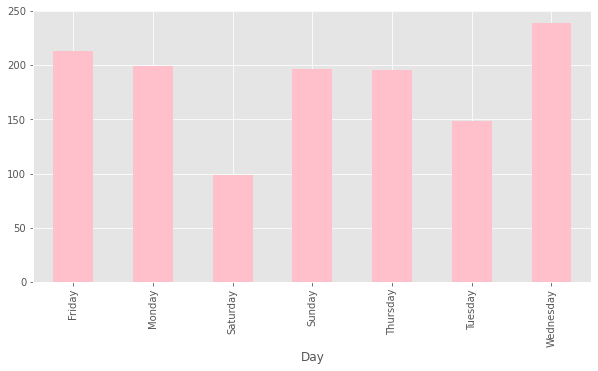

In [8]:
# Frequency of fatalities during the week
fatality_day = big_shoot_df.groupby('Day')['Total Fatalities'].sum()
fatality_day.plot(kind='bar',x='Day',y='Total Fatalities',figsize=(10,5),color='pink') 

### Explore 2015 and 2016 further 

- Did most shootings that occur in these two years, also happen to take place in the top 3 states where most shootings occurred (California, Florida, Texas)?

<AxesSubplot:title={'center':'Total Shootings per Year'}>

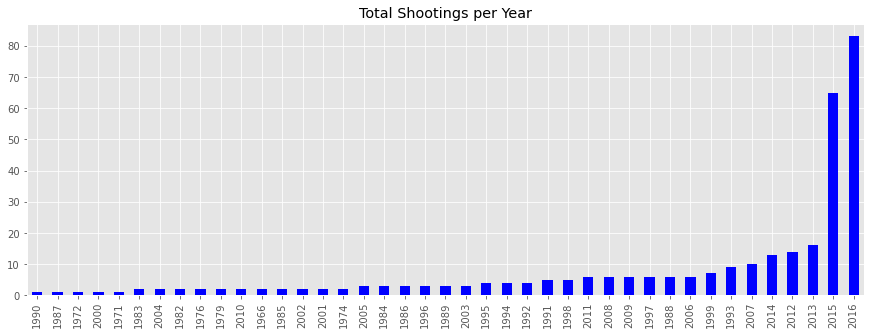

In [9]:
# Frequency fatalities per year
fatality_year = big_shoot_df['Year'].value_counts().sort_values()
fatality_year.plot(kind='bar',figsize=(15,5),color='blue', title='Total Shootings per Year')

<AxesSubplot:xlabel='Year'>

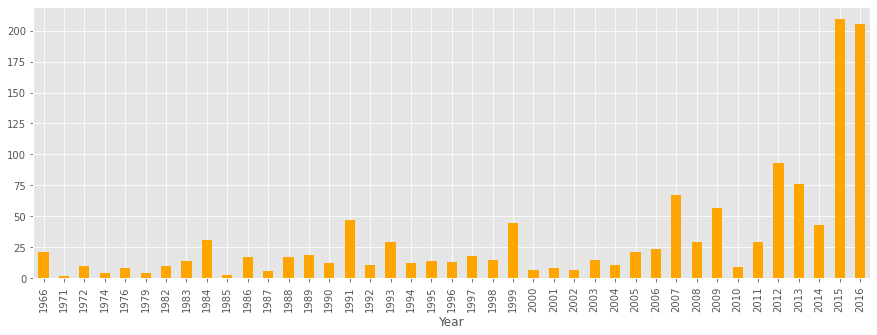

In [10]:
# Frequency of Fatalities per Year
state_by_year = big_shoot_df.groupby('Year')['Total Fatalities'].sum()
state_by_year.plot(kind='bar',figsize=(15,5),color='orange')

<AxesSubplot:>

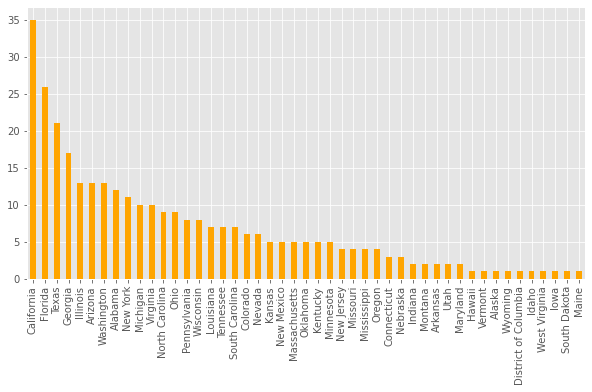

In [11]:
# Frequency of shootings per State
state = big_shoot_df['State'].value_counts()
state.plot(kind='bar',figsize=(10,5),color='orange')

<AxesSubplot:>

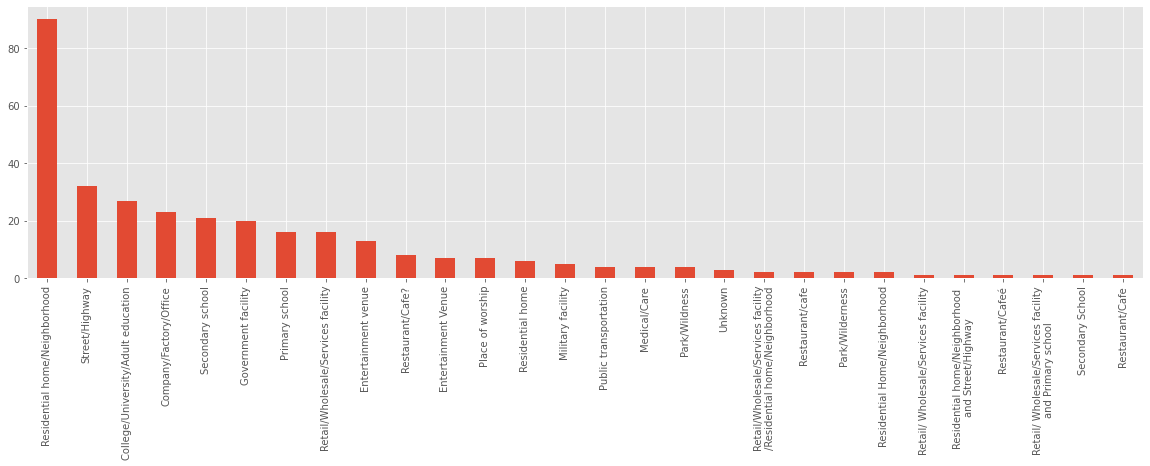

In [12]:
place = big_shoot_df['Place Type'].value_counts()
place.plot(kind='bar',figsize=(20,5))

<AxesSubplot:>

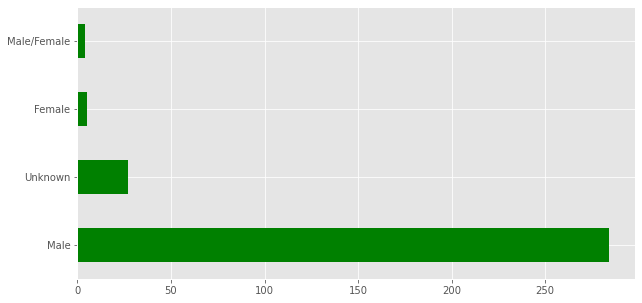

In [13]:
gender = big_shoot_df['Shooter Sex'].value_counts()
gender.plot(kind='barh',figsize=(10,5),color='green')

<AxesSubplot:>

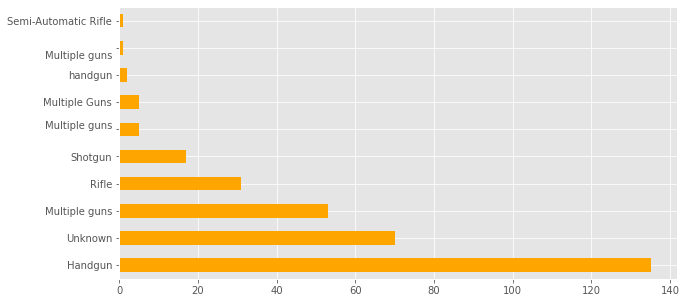

In [14]:
gun_type = big_shoot_df['Type of Gun - General'].value_counts()
gun_type.plot(kind='barh',figsize=(10,5),color='orange')

<AxesSubplot:>

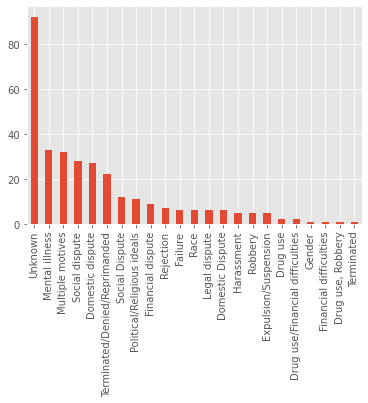

In [15]:
motive = big_shoot_df['Possible Motive - General'].value_counts()
motive.plot(kind='bar')

### Analysing the Correlation between variables
There is a high positive correlation between the number of victims, fatalities and injuries indicating that the higher the number of victims involved, the higher the number of fatalities and injuries and vice versa. 

In [16]:
big_shoot_corr = big_shoot_df.corr()
big_shoot_corr

,Latitude,Longitude,Civilian Fatalities,Civilian Injured,Enforcement Fatalities,Enforcement Injured,Total Fatalities,Total Victims,Depreciation,Year
Latitude,1.000000,-0.112118,-0.036092,-0.071853,-0.013266,-0.110404,-0.023718,-0.072369,0.027341,-0.049029
Longitude,-0.112118,1.000000,-0.033560,-0.058744,-0.066121,-0.039530,-0.048993,-0.061157,0.014416,0.136133
Civilian Fatalities,-0.036092,-0.033560,1.000000,0.473065,-0.022872,-0.015401,0.987311,0.801986,-0.010263,-0.154218
Civilian Injured,-0.071853,-0.058744,0.473065,1.000000,0.024813,-0.021544,0.456666,0.900223,-0.006528,-0.172860
Enforcement Fatalities,-0.013266,-0.066121,-0.022872,0.024813,1.000000,0.438996,0.078224,0.074686,-0.003111,-0.168212
Enforcement Injured,-0.110404,-0.039530,-0.015401,-0.021544,0.438996,1.000000,0.035721,0.053611,-0.004282,-0.075572
Total Fatalities,-0.023718,-0.048993,0.987311,0.456666,0.078224,0.035721,1.000000,0.792299,-0.015558,-0.157251
Total Victims,-0.072369,-0.061157,0.801986,0.900223,0.074686,0.053611,0.792299,1.000000,-0.009754,-0.202474
Depreciation,0.027341,0.014416,-0.010263,-0.006528,-0.003111,-0.004282,-0.015558,-0.009754,1.000000,0.014036
Year,-0.049029,0.136133,-0.154218,-0.172860,-0.168212,-0.075572,-0.157251,-0.202474,0.014036,1.000000


<AxesSubplot:>

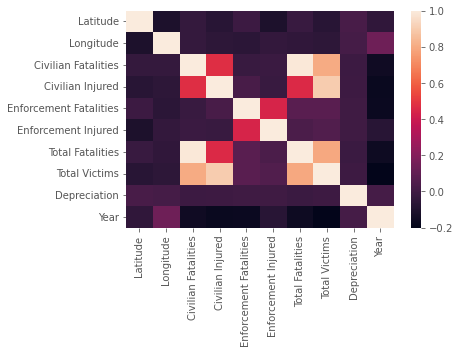

In [17]:
# Create a heatmap from the correlation values
sns.heatmap(big_shoot_corr)

<AxesSubplot:>

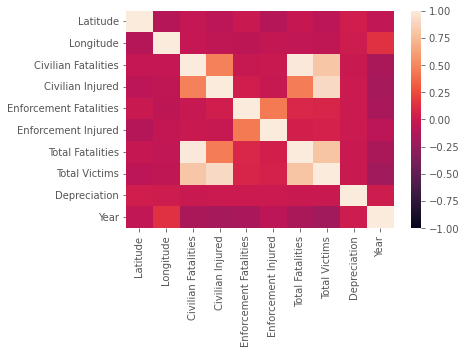

In [18]:
# Create a heatmap from the correlation values and adjust the scale
sns.heatmap(big_shoot_corr, vmin=-1, vmax=1)

## Exploring 2006  
- What factors influenced the shootings in 2006? 
- Did the shooter suffer from any mental illness? 
- Were any of the shootings racially motivated? 
- Where did the shootings occur most? In religious settings, workplaces or schools? 
- 

## Findings 
In 2006, there was a total of 6 shootings. One third (2) of the shootings took place in Pennsylvania and 1 shooting per state in California, Washington, Vermont, and North Carolina. Despite two shootings taking place in Pennsylvania in the same year, California suffered a higher number of fatalities with a total of 8 deaths compared to Pennsylvania combined (6 civilian deaths in total, none enforcement related). 

Pennylvania however had a higher number of victims involved and both shootings occurred in educational facilities such as a College/University and a school. The motives for the shootings seemed to be unrelated to race though the shooters mental health was unclear. 

* 1 of the 6 shooters were female and was also the eldest, aged 44. She suffered from some form of mental illness, was of white or european descent and her possible motive was ....
* Most of the shooters were young adults aged between 18 - 32. One of the shooters was aged 44, 


In [19]:
big_06 = big_shoot_df['Year'] == 2006
big_shoot_06 = big_shoot_df[big_06]
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
big_shoot_06

,Title,Location,City,State,Latitude,Longitude,Civilian Fatalities,Civilian Injured,Enforcement Fatalities,Enforcement Injured,Total Fatalities,Total Victims,Description,Date,Day,Date - Detailed,Shooter Name,Number of shooters,Shooter Age(s),Average Shooter Age,Shooter Sex,Shooter Race,Type of Gun - Detailed,Type of Gun - General,Total Shotguns,Total Rifles,Total Handguns,Total Guns Used,Total Automatic Guns,Total Semi-Automatic Guns,Fate of Shooter at the scene,Fate of Shooter,Shooter's Cause of Death,School Related,Place Type,Relationship to Incident Location,Targeted Victim/s - Detailed,Targeted Victim/s - General,Possible Motive - Detailed,Possible Motive - General,Mental Illness Details,Mental Illness,Military Experience,Class,Depreciation,Year
89,Goleta Post Office,"Goleta, California",Goleta,California,34.436061,-119.859362,7,0,0,0,8,7,"On January 30, 2006, a 44-year-old postal work...",1/30/2006,Monday,"Monday, January 30, 2006",Jennifer San Marco,1,44,44,Female,White American or European American,9mm Smith & Wesso 915,Handgun,0,0,1,1,0,1,Deceased,Deceased,Suicide,No,Government facility,Place of business/employment,"Neighbor, postal workers",Colleague/Workmate/Business acquaintance,The shooter had been on leave from the post of...,Mental illness,"Shortly before the incident, the shooter had b...",Yes,Unknown,SPK,1,2006
90,"Party in Capitol Hill, Seattle","Seattle, Washington",Seattle,Washington,47.621996,-122.323646,6,2,0,0,7,8,"On March 25, 2006, an unemployed 28-year old w...",3/25/2006,Saturday,"Saturday, March 25, 2006",Aaron Kyle Huff,1,28,28,Male,White American or European American,12 gauge pistol-grip Winchester 1300 Defender ...,Multiple guns\n,1,0,1,2,0,1,Deceased,Deceased,Suicide,No,Residential home/Neighborhood,Place of recreation,General public attending the party,General public,The shooter had previously attended raves and ...,Multiple motives,Although the police were unable to locate any ...,No,Unknown,MS,1,2006
91,Essex Elementary School,"Essex Junction, Vermont",Essex Junction,Vermont,44.490220,-73.114006,2,2,0,0,2,4,"On August 24, 2006, a 26-year old killed two p...",8/24/2006,Thursday,"Thursday, August 24, 2006",Christopher Williams,1,26,26,Male,Black American or African American,Semi-automatic .45 caliber pistol,Handgun,0,0,1,1,0,1,Custody,Custody,Not applicable,Yes,Residential home/Neighborhood,Place of residency,"Ex-girlfriend's mother, ex-girlfriend's cowork...",Romantic partner,The shooter had just broken up with his girlfr...,Domestic dispute,The shooter was exposed to domestic violence e...,Yes,Unknown,MS,1,2006
92,Orange High School,"Hillsborough, North Carolina",Hillsborough,North Carolina,36.040999,-79.097012,1,2,0,0,1,3,"On August 30, 2006, a 18-year old former stude...",8/30/2006,Wednesday,"Wednesday, August 30, 2006",Alvaro Rafael Castillo,1,18,18,Male,Some other race,9mm semi-automatic rifle and sawed-off shotgun,Multiple guns\n,1,1,0,2,0,1,Custody,Custody,Not applicable,Yes,Secondary school,Place of schooling,"Father, students and teachers at his previous ...",Students/Classmates/Teacher,The shooter admitted to kill his father becaus...,Mental illness,"The shooter was committed four months earlier,...",Yes,Unknown,SPK,1,2006
93,Duquesne University,"Pittsburgh, Pennsylvania",Pittsburgh,Pennsylvania,40.439485,-79.976316,0,5,0,0,0,5,"On September 17, 2006, two 18-year old men sho...",9/17/2006,Sunday,"Sunday, September 17, 2006","William Holmes, Derrick Lee",1,18,18,Male,Black American or African American,"Semi-automatic 9mm handgun, 0.38 revolver",Handgun,0,0,2,2,0,1,Escaped,Custody,Not applicable,Yes,College/University/Adult education,Place of recreation,Male basketball players that had talked to one...,Students/Classmates/Teacher,It is unclear how a fight between the gunmen a...,Social dispute,Unknown,Unknown,Unknown,MS,1,2006
94,West Nickel Mines Amish School,"Nickel Mines, Lancaster, Pennsylvania",Lancaster,Pennsylvania,40.042144,-76.301009,5,5,0,0,6,10,"On October 2, 2006, a 32-year o

In [20]:
big_shoot_06 = big_shoot_06.drop(['Day','Average Shooter Age','Military Experience'],axis=1)
big_shoot_06

,Title,Location,City,State,Latitude,Longitude,Civilian Fatalities,Civilian Injured,Enforcement Fatalities,Enforcement Injured,Total Fatalities,Total Victims,Description,Date,Date - Detailed,Shooter Name,Number of shooters,Shooter Age(s),Shooter Sex,Shooter Race,Type of Gun - Detailed,Type of Gun - General,Total Shotguns,Total Rifles,Total Handguns,Total Guns Used,Total Automatic Guns,Total Semi-Automatic Guns,Fate of Shooter at the scene,Fate of Shooter,Shooter's Cause of Death,School Related,Place Type,Relationship to Incident Location,Targeted Victim/s - Detailed,Targeted Victim/s - General,Possible Motive - Detailed,Possible Motive - General,Mental Illness Details,Mental Illness,Class,Depreciation,Year
89,Goleta Post Office,"Goleta, California",Goleta,California,34.436061,-119.859362,7,0,0,0,8,7,"On January 30, 2006, a 44-year-old postal work...",1/30/2006,"Monday, January 30, 2006",Jennifer San Marco,1,44,Female,White American or European American,9mm Smith & Wesso 915,Handgun,0,0,1,1,0,1,Deceased,Deceased,Suicide,No,Government facility,Place of business/employment,"Neighbor, postal workers",Colleague/Workmate/Business acquaintance,The shooter had been on leave from the post of...,Mental illness,"Shortly before the incident, the shooter had b...",Yes,SPK,1,2006
90,"Party in Capitol Hill, Seattle","Seattle, Washington",Seattle,Washington,47.621996,-122.323646,6,2,0,0,7,8,"On March 25, 2006, an unemployed 28-year old w...",3/25/2006,"Saturday, March 25, 2006",Aaron Kyle Huff,1,28,Male,White American or European American,12 gauge pistol-grip Winchester 1300 Defender ...,Multiple guns\n,1,0,1,2,0,1,Deceased,Deceased,Suicide,No,Residential home/Neighborhood,Place of recreation,General public attending the party,General public,The shooter had previously attended raves and ...,Multiple motives,Although the police were unable to locate any ...,No,MS,1,2006
91,Essex Elementary School,"Essex Junction, Vermont",Essex Junction,Vermont,44.490220,-73.114006,2,2,0,0,2,4,"On August 24, 2006, a 26-year old killed two p...",8/24/2006,"Thursday, August 24, 2006",Christopher Williams,1,26,Male,Black American or African American,Semi-automatic .45 caliber pistol,Handgun,0,0,1,1,0,1,Custody,Custody,Not applicable,Yes,Residential home/Neighborhood,Place of residency,"Ex-girlfriend's mother, ex-girlfriend's cowork...",Romantic partner,The shooter had just broken up with his girlfr...,Domestic dispute,The shooter was exposed to domestic violence e...,Yes,MS,1,2006
92,Orange High School,"Hillsborough, North Carolina",Hillsborough,North Carolina,36.040999,-79.097012,1,2,0,0,1,3,"On August 30, 2006, a 18-year old former stude...",8/30/2006,"Wednesday, August 30, 2006",Alvaro Rafael Castillo,1,18,Male,Some other race,9mm semi-automatic rifle and sawed-off shotgun,Multiple guns\n,1,1,0,2,0,1,Custody,Custody,Not applicable,Yes,Secondary school,Place of schooling,"Father, students and teachers at his previous ...",Students/Classmates/Teacher,The shooter admitted to kill his father becaus...,Mental illness,"The shooter was committed four months earlier,...",Yes,SPK,1,2006
93,Duquesne University,"Pittsburgh, Pennsylvania",Pittsburgh,Pennsylvania,40.439485,-79.976316,0,5,0,0,0,5,"On September 17, 2006, two 18-year old men sho...",9/17/2006,"Sunday, September 17, 2006","William Holmes, Derrick Lee",1,18,Male,Black American or African American,"Semi-automatic 9mm handgun, 0.38 revolver",Handgun,0,0,2,2,0,1,Escaped,Custody,Not applicable,Yes,College/University/Adult education,Place of recreation,Male basketball players that had talked to one...,Students/Classmates/Teacher,It is unclear how a fight between the gunmen a...,Social dispute,Unknown,Unknown,MS,1,2006
94,West Nickel Mines Amish School,"Nickel Mines, Lancaster, Pennsylvania",Lancaster,Pennsylvania,40.042144,-76.301009,5,5,0,0,6,10,"On October 2, 2006, a 32-year old men killed f...",10/2/2006,"Monday, October 02, 2006",Charles Carl Roberts IV,1,32,Male,White American or European American,"Springfield X

<AxesSubplot:>

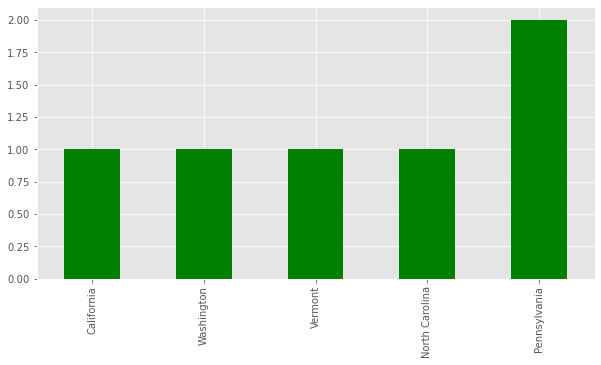

In [21]:
state_06 = big_shoot_06['State'].value_counts().sort_values()
state_06.plot(kind='bar',figsize=(10,5),color='green')

<AxesSubplot:ylabel='State'>

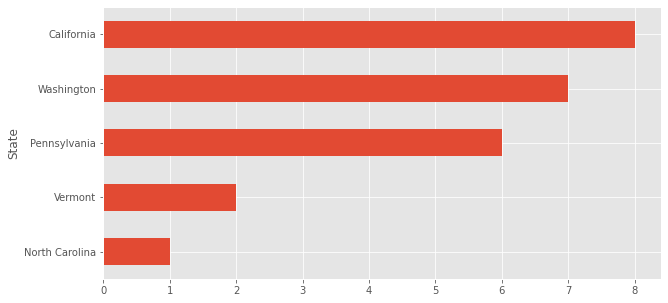

In [22]:
state_fatal_06 = big_shoot_06.groupby('State')['Total Fatalities'].sum().sort_values()
state_fatal_06.plot(kind='barh',figsize=(10,5))

<AxesSubplot:ylabel='State'>

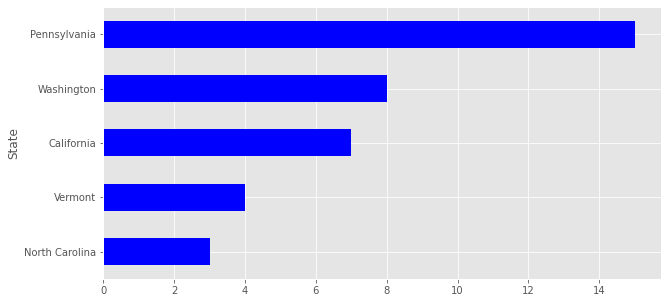

In [23]:
state_victims_06 = big_shoot_06.groupby('State')['Total Victims'].sum().sort_values()
state_victims_06.plot(kind='barh',figsize=(10,5),color='blue')

In [24]:
state_victims_06

State
North Carolina     3
Vermont            4
California         7
Washington         8
Pennsylvania      15
Name: Total Victims, dtype: int64

<AxesSubplot:>

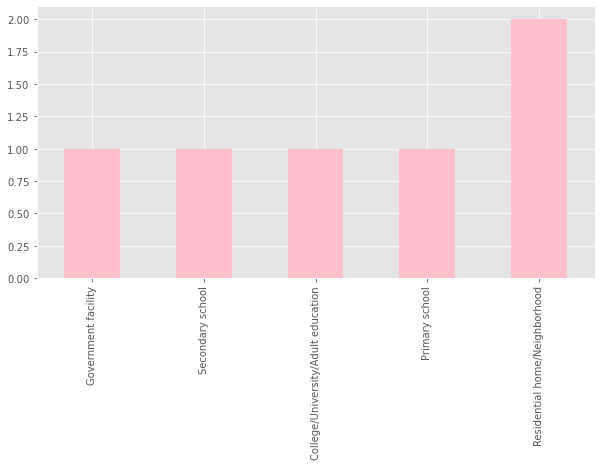

In [25]:
location_06 = big_shoot_06['Place Type'].value_counts().sort_values()
location_06.plot(kind='bar',figsize=(10,5),color='pink')

In [26]:
enforcement_fatalities_06 = big_shoot_06['Enforcement Fatalities'].sum()
enforcement_fatalities_06

0

In [27]:
enforcement_injured_06 = big_shoot_06['Enforcement Injured'].sum()
enforcement_injured_06

0

In [28]:
civilian_fatalities_06 = big_shoot_06['Civilian Fatalities'].sum()
civilian_fatalities_06

21

In [29]:
civilian_injured_06 = big_shoot_06['Civilian Injured'].sum()
civilian_injured_06

16

In [30]:
shooters_count = big_shoot_06['Number of shooters'].value_counts()
shooters_count

1    6
Name: Number of shooters, dtype: int64

<AxesSubplot:>

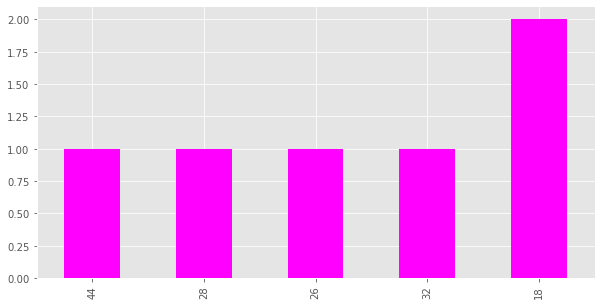

In [32]:
avg_shooter_age = big_shoot_06['Shooter Age(s)'].value_counts().sort_values()
avg_shooter_age.plot(kind='bar',figsize=(10,5),color='magenta')

<AxesSubplot:ylabel='Shooter Sex'>

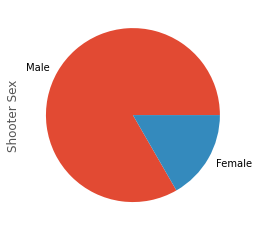

In [33]:
gender_06 = big_shoot_06['Shooter Sex'].value_counts()
gender_06.plot(kind='pie')

In [34]:
gender_06
male = 5 
female = 1

In [35]:
# create an if-else statement to determine the gender split between shooters
if male > female: 
    print("There were more male shooters than females in 2006.")
else: 
    print("There were more females shooters than males in 2006.")

There were more male shooters than females in 2006.


### Different Dataset - contains more recent data > 2016

In [36]:
mass_shootings = Path("mj_mass_shootings.csv")
shootings_df = pd.read_csv(mass_shootings)
pd.set_option('display.max_columns', None)

In [37]:
shootings_df = shootings_df.drop(['sources','mental_health_sources','sources_additional_age'],axis=1)
shootings_df.head(10)

,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,mental_health_details,weapons_obtained_legally,where_obtained,weapon_type,weapon_details,race,gender,latitude,longitude,type,year
0,Sacramento County church shooting,"Sacramento, California",2/28/22,"""A man believed to be meeting his three childr...",4,0,4,Religious,-,-,-,-,-,-,-,-,M,38.601110,-121.418966,Mass,2022
1,Oxford High School shooting,"Oxford, Michigan",11/30/21,"Ethan Crumbley, a 15-year-old student at Oxfor...",4,7,11,School,15,-,-,-,-,semiautomatic handgun,Sig Sauer 9mm pistol,-,M,42.844108,-83.259928,Mass,2021
2,San Jose VTA shooting,"San Jose, California",5/26/21,"Samuel Cassidy, 57, a Valley Transportation Au...",9,0,9,Workplace,57,yes,"Perpetrator had a history of depression, angry...",-,-,semiautomatic handguns,-,-,M,37.316097,-121.888533,Mass,2021
3,FedEx warehouse shooting,"Indianapolis, Indiana",4/15/21,"Brandon Scott Hole, 19, opened fire around 11 ...",8,7,15,Workplace,19,yes,Perpetrator had been reported to police in 202...,yes,-,semiautomatic rifle,-,White,M,39.686630,-86.323130,Mass,2021
4,Orange office complex shooting,"Orange, California",3/31/21,"Aminadab Gaxiola Gonzalez, 44, allegedly opene...",4,1,5,Workplace,-,-,-,-,-,semiautomatic handgun,-,-,M,33.835420,-117.853790,Mass,2021
5,Boulder supermarket shooting,"Boulder, Colorado",3/22/21,"Ahmad Al Aliwi Alissa, 21, carried out a mass ...",10,0,10,Workplace,21,yes,Brother described him as paranoid; multiple ac...,Yes,-,"semiautomatic rifle, semiautomatic handgun; ta...",Ruger AR-556; weapon was purchased six days be...,-,M,39.986961,-105.251168,Mass,2021
6,Atlanta massage parlor shootings,"Atlanta, Georgia",3/16/21,"Robert Aaron Long, 21, killed eight people at ...",8,1,9,Workplace,21,-,-,-,-,-,-,White,M,34.111653,-84.580376,Spree,2021
7,Springfield convenience store shooting,"Springfield, Missouri",3/16/20,"Joaquin S. Roman, 31, went on a rampage culmin...",4,0,4,Workplace,31,-,-,-,-,-,-,-,M,37.210432,-93.236860,Mass,2020
8,Molson Coors shooting,"Milwaukee, Wisconsin",2/26/20,"Anthony Ferrill, 51, an employee armed with tw...",5,0,5,Workplace,51,-,-,-,-,semiautomatic handgun,-,Black,M,43.044511,-87.962537,Mass,2020
9,Jersey City kosher market shooting,"Jersey City, New Jersey",12/10/19,"David N. Anderson, 47, and Francine Graham, 50...",4,3,7,Other,-,-,-,-,-,-,-,Black,Male & Female,40.707363,-74.083609,Spree,2019


In [38]:
shootings_df_cleaned = shootings_df.replace("-","NULL")
# shootings_df_cleaned.columns = shootings_df_cleaned.columns.str.replace('location.1','location',regex=True)                                                                 
shootings_df_cleaned.head()

,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,mental_health_details,weapons_obtained_legally,where_obtained,weapon_type,weapon_details,race,gender,latitude,longitude,type,year
0,Sacramento County church shooting,"Sacramento, California",2/28/22,"""A man believed to be meeting his three childr...",4,0,4,Religious,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,M,38.601110,-121.418966,Mass,2022
1,Oxford High School shooting,"Oxford, Michigan",11/30/21,"Ethan Crumbley, a 15-year-old student at Oxfor...",4,7,11,School,15,NULL,NULL,NULL,NULL,semiautomatic handgun,Sig Sauer 9mm pistol,NULL,M,42.844108,-83.259928,Mass,2021
2,San Jose VTA shooting,"San Jose, California",5/26/21,"Samuel Cassidy, 57, a Valley Transportation Au...",9,0,9,Workplace,57,yes,"Perpetrator had a history of depression, angry...",NULL,NULL,semiautomatic handguns,NULL,NULL,M,37.316097,-121.888533,Mass,2021
3,FedEx warehouse shooting,"Indianapolis, Indiana",4/15/21,"Brandon Scott Hole, 19, opened fire around 11 ...",8,7,15,Workplace,19,yes,Perpetrator had been reported to police in 202...,yes,NULL,semiautomatic rifle,NULL,White,M,39.686630,-86.323130,Mass,2021
4,Orange office complex shooting,"Orange, California",3/31/21,"Aminadab Gaxiola Gonzalez, 44, allegedly opene...",4,1,5,Workplace,NULL,NULL,NULL,NULL,NULL,semiautomatic handgun,NULL,NULL,M,33.835420,-117.853790,Mass,2021


In [39]:
shootings_df_cleaned['location'] = shootings_df_cleaned['location'].str.split(',').str[-1]
shootings_df_cleaned

,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,mental_health_details,weapons_obtained_legally,where_obtained,weapon_type,weapon_details,race,gender,latitude,longitude,type,year
0,Sacramento County church shooting,California,2/28/22,"""A man believed to be meeting his three childr...",4,0,4,Religious,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,M,38.601110,-121.418966,Mass,2022
1,Oxford High School shooting,Michigan,11/30/21,"Ethan Crumbley, a 15-year-old student at Oxfor...",4,7,11,School,15,NULL,NULL,NULL,NULL,semiautomatic handgun,Sig Sauer 9mm pistol,NULL,M,42.844108,-83.259928,Mass,2021
2,San Jose VTA shooting,California,5/26/21,"Samuel Cassidy, 57, a Valley Transportation Au...",9,0,9,Workplace,57,yes,"Perpetrator had a history of depression, angry...",NULL,NULL,semiautomatic handguns,NULL,NULL,M,37.316097,-121.888533,Mass,2021
3,FedEx warehouse shooting,Indiana,4/15/21,"Brandon Scott Hole, 19, opened fire around 11 ...",8,7,15,Workplace,19,yes,Perpetrator had been reported to police in 202...,yes,NULL,semiautomatic rifle,NULL,White,M,39.686630,-86.323130,Mass,2021
4,Orange office complex shooting,California,3/31/21,"Aminadab Gaxiola Gonzalez, 44, allegedly opene...",4,1,5,Workplace,NULL,NULL,NULL,NULL,NULL,semiautomatic handgun,NULL,NULL,M,33.835420,-117.853790,Mass,2021
5,Boulder supermarket shooting,Colorado,3/22/21,"Ahmad Al Aliwi Alissa, 21, carried out a mass ...",10,0,10,Workplace,21,yes,Brother described him as paranoid; multiple ac...,Yes,NULL,"semiautomatic rifle, semiautomatic handgun; ta...",Ruger AR-556; weapon was purchased six days be...,NULL,M,39.986961,-105.251168,Mass,2021
6,Atlanta massage parlor shootings,Georgia,3/16/21,"Robert Aaron Long, 21, killed eight people at ...",8,1,9,Workplace,21,NULL,NULL,NULL,NULL,NULL,NULL,White,M,34.111653,-84.580376,Spree,2021
7,Springfield convenience store shooting,Missouri,3/16/20,"Joaquin S. Roman, 31, went on a rampage culmin...",4,0,4,Workplace,31,NULL,NULL,NULL,NULL,NULL,NULL,NULL,M,37.210432,-93.236860,Mass,2020
8,Molson Coors shooting,Wisconsin,2/26/20,"Anthony Ferrill, 51, an employee armed with tw...",5,0,5,Workplace,51,NULL,NULL,NULL,NULL,semiautomatic handgun,NULL,Black,M,43.044511,-87.962537,Mass,2020
9,Jersey City kosher market shooting,New Jersey,12/10/19,"David N. Anderson, 47, and Francine Graham, 50...",4,3,7,Other,NULL,NULL,NULL,NULL,NULL,NULL,NULL,Black,Male & Female,40.707363,-74.083609,Spree,2019


<AxesSubplot:xlabel='year'>

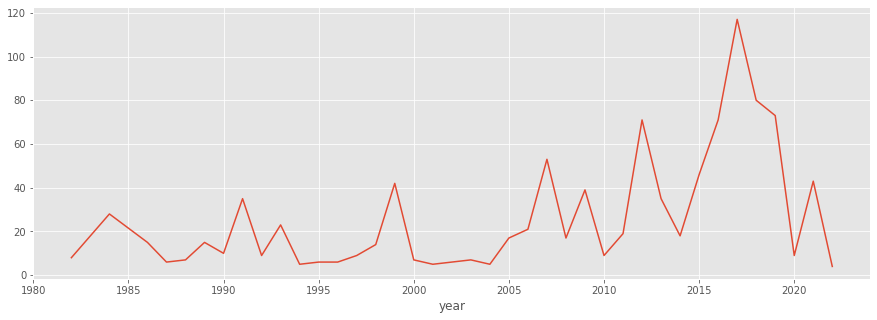

In [40]:
fatality_per_year = shootings_df_cleaned.groupby('year')['fatalities'].sum()
fatality_per_year.plot(kind='line',x='year',y='fatalities',figsize=(15,5))    

## Correlation
**Note:** Correlation is only valid for numeric variables

In [41]:
shootings_df_cleaned_corr = shootings_df_cleaned.corr()
shootings_df_cleaned_corr

,fatalities,injured,total_victims,latitude,longitude,year
fatalities,1.000000,0.661317,0.737266,-0.204248,0.022313,-0.017277
injured,0.661317,1.000000,0.994340,-0.052412,-0.105125,0.050385
total_victims,0.737266,0.994340,1.000000,-0.076135,-0.091523,0.042934
latitude,-0.204248,-0.052412,-0.076135,1.000000,-0.063901,0.103112
longitude,0.022313,-0.105125,-0.091523,-0.063901,1.000000,0.004830
year,-0.017277,0.050385,0.042934,0.103112,0.004830,1.000000


## Correlation
The below heatmaps indicate a positive correlation between fatalities and injured.

<AxesSubplot:>

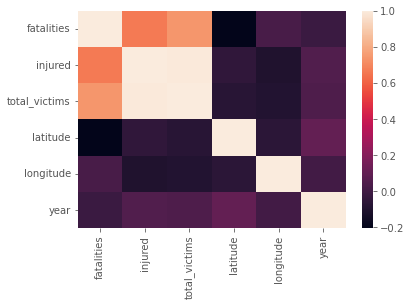

In [42]:
# Create a heatmap from the correlation values
sns.heatmap(shootings_df_cleaned_corr)

<AxesSubplot:>

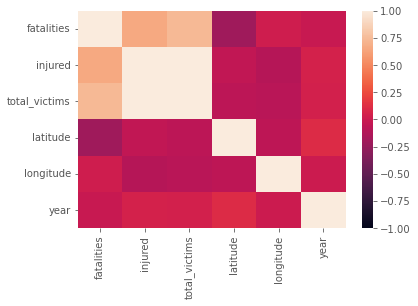

In [43]:
# Create a heatmap from the correlation values and adjust the scale
sns.heatmap(shootings_df_cleaned_corr, vmin=-1, vmax=1)

<AxesSubplot:ylabel='location.1'>

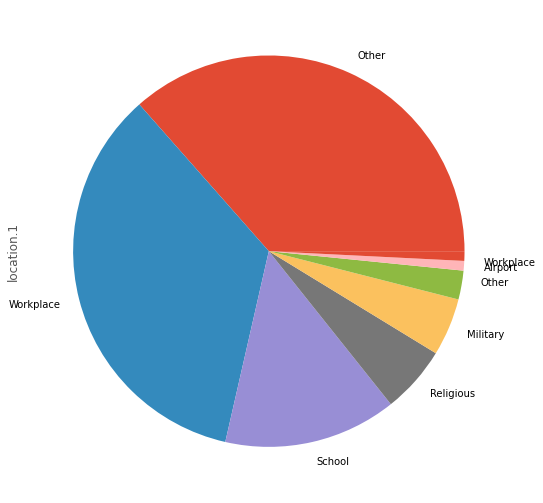

In [44]:
# Count the frequency of shootings per state 
state_cleaned = shootings_df['location.1'].value_counts()
state_cleaned.plot(kind='pie',figsize=(9,9))

## Diving deeper into shootings in 2016
- Comparing shooting data from 2006 to 2016 to identify changes over 10 year period 


In [73]:
data_2016 = shootings_df_cleaned['year'] == 2016
shootings_df_2016 = shootings_df_cleaned[data_2016]
shootings_df_2016 = shootings_df_2016.drop(['fatalities', 'injured', 'weapons_obtained_legally', 'where_obtained', 'weapon_type', 'weapon_details'], axis=1)
shootings_df_2016.head()
# age_distribution.plot(kind='line',x=figsize=(10,5),color='red')

,case,location,date,summary,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,mental_health_details,race,gender,latitude,longitude,type,year
42,Cascade Mall shooting,Washington,9/23/2016,"Arcan Cetin, 20, killed a teen girl and three ...",5,Other,20,Yes,"According to the Cetin's stepfather he had ""me...",NULL,M,48.461367,-122.337918,Mass,2016
43,Baton Rouge police shooting,Lousiana,7/17/2016,"Gavin Long, 29, a former Marine who served in ...",6,Other,29,Yes,Unclear,Black,M,30.433601,-91.081403,Spree,2016
44,Dallas police shooting,Texas,7/7/2016,"Micah Xavier Johnson, a 25-year-old Army veter...",16,Other,25,Unclear,Unclear,Black,M,32.780105,-96.800008,Mass,2016
45,Orlando nightclub massacre,Florida,6/12/2016,"Omar Mateen, 29, attacked the Pulse nighclub i...",102,Other,29,Unclear,Unclear,Other,M,28.519718,-81.376777,Mass,2016
46,Excel Industries mass shooting,Kansas,2/25/2016,"Cedric L. Ford, who worked as a painter at a m...",17,Workplace,38,Unclear,Unclear,Black,M,38.135992,-97.425145,Mass,2016


In [57]:
locations_2016 = shootings_df_2016['location.1'].value_counts()
locations_2016

Other        5
Workplace    1
Name: location.1, dtype: int64

<AxesSubplot:>

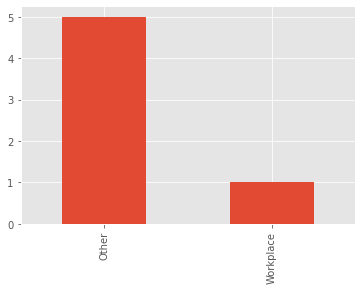

In [59]:
locations_2016.plot(kind='bar')

<AxesSubplot:ylabel='gender'>

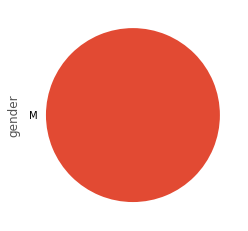

In [58]:
gender = shootings_df_2016['gender'].value_counts()
gender.plot(kind='pie')

In [60]:
had_illness = shootings_df_2016['prior_signs_mental_health_issues'].value_counts()
had_illness

Unclear    4
Yes        2
Name: prior_signs_mental_health_issues, dtype: int64

In [63]:
shootings_df_2016['location'] = shootings_df_2016['location'].str.split(',').str[-1]
shootings_df_2016

/Users/alexabdullah/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,mental_health_details,weapons_obtained_legally,where_obtained,weapon_type,weapon_details,race,gender,latitude,longitude,type,year
42,Cascade Mall shooting,Washington,9/23/2016,"Arcan Cetin, 20, killed a teen girl and three ...",5,0,5,Other,20,Yes,"According to the Cetin's stepfather he had ""me...",TBD,NULL,Rifle,Ruger .22-caliber,NULL,M,48.461367,-122.337918,Mass,2016
43,Baton Rouge police shooting,Lousiana,7/17/2016,"Gavin Long, 29, a former Marine who served in ...",3,3,6,Other,29,Yes,Unclear,Unknown,NULL,Two semiautomatic rifles; one semiautomatic ha...,"IWI Tavor SAR 5.56 caliber rifle, Springfield ...",Black,M,30.433601,-91.081403,Spree,2016
44,Dallas police shooting,Texas,7/7/2016,"Micah Xavier Johnson, a 25-year-old Army veter...",5,11,16,Other,25,Unclear,Unclear,Yes,online and or gun show,"Semiautomatic rifle, semiautomatic handguns",Izhmash-Saiga 5.45mm (AK-style) semiautomatic ...,Black,M,32.780105,-96.800008,Mass,2016
45,Orlando nightclub massacre,Florida,6/12/2016,"Omar Mateen, 29, attacked the Pulse nighclub i...",49,53,102,Other,29,Unclear,Unclear,Yes,"Shooting center in Port St. Lucie, Florida","Semiautomatic rifle, semiautomatic handgun","Sig Sauer MCX rifle, Glock 17 9mm; high-capaci...",Other,M,28.519718,-81.376777,Mass,2016
46,Excel Industries mass shooting,Kansas,2/25/2016,"Cedric L. Ford, who worked as a painter at a m...",3,14,17,Workplace,38,Unclear,Unclear,Yes,NULL,"Semiautomatic rifle, semiautomatic handgun","Zastava Serbia AK-47-style rifle, Glock Model ...",Black,M,38.135992,-97.425145,Mass,2016
47,Kalamazoo shooting spree,Michigan,2/20/2016,"Jason B. Dalton, a driver for Uber, apparently...",6,2,8,Other,45,Unclear,Unclear,Yes,NULL,Semiautomatic handgun,9 mm handgun (ammo used unclear),White,M,42.236689,-85.674795,Mass,2016


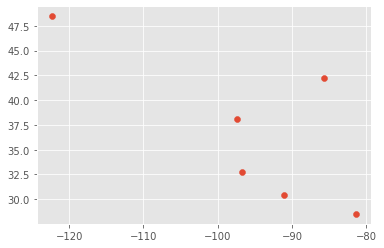

In [64]:
import matplotlib.pyplot as plt
plt.scatter(x=shootings_df_2016['longitude'], y=shootings_df_2016['latitude'])
plt.show()

In [68]:
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

ModuleNotFoundError: No module named 'geopandas'

In [67]:
geometry = [Point(xy) for xy in zip(shootings_df_2016['longitude'],shootings_df_2016['latitude'])]
geometry[:3]

NameError: name 'Point' is not defined

In [54]:
crs = {'init':'epsg:4326'}

In [55]:
geo_df = gpd.GeoDataFrame(shootings_df_2017,crs=crs,geometry=geometry)
geo_df.head()
geo_df = geo_df.replace("NaN",0)
geo_df

NameError: name 'gpd' is not defined

In [56]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf = GeoDataFrame(geo_df, geometry=geometry) 
gdp.plot(ax=world.plot(figsize=(20, 10)), marker='o', color='red', markersize=15);

# We restrict to South America
#ax = world[world.continent == 'South America'].plot(figsize=(30,8))


NameError: name 'gpd' is not defined